![NTNU logo](img/ntnu.jpg)

![itdagene](img/itdagene.png)

![NOIS](img/nois.png)

<center> <h1> NTNU Course description classification</h1> </center>

## Goals
 - Short introduction Jupyter Notebook
 - End-to-end Machine Learning case
 - Data Science steps
 - 2 minutes Pandas introduction
 - Scikit-learn introduction 
 - Natural Language Processing
 - Superficial overview naive bayes + logistic regression
 

## Introduction Jupyter Notebook
- Pros - Cons
- When is it suitable?

In [1]:
a = 2
b = 3
a+b

5

Run bash commands from notebook

In [2]:
#!pip install -r requirements.txt

Import necessary modules

In [3]:
import pandas as pd
import time
import datetime as dt
import numpy as np
import requests
import urllib3
import json 
import random 
from tqdm import tqdm
import pickle 
import string
import codecs
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from collections import defaultdict

sns.set()

%matplotlib inline

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

LOAD = True
SAVE = False
TRAIN = True

## Data science step 1: Data collection

Get all courses at NTNU

In [4]:
if LOAD:
    res_json = pickle.load(open("course_desc.dict", "rb"))
else:
    res = requests.get("http://www.ime.ntnu.no/api/course/-")
    res_json = json.loads(res.text)
    pickle.dump(res_json, open("course_desc.dict", "wb"))

In [5]:
len(res_json["course"])

5586

In [6]:
res_json["course"][0]

{'code': 'MA3402',
 'name': 'Analyse på mangfoldigheter',
 'norwegianName': 'Analyse på mangfoldigheter',
 'newNorwegianName': 'Analyse på mangfoldigheter',
 'englishName': 'Analysis on Manifolds',
 'versionCode': '1'}

In [7]:
random.choice(res_json["course"])

{'code': 'TTT4215',
 'name': 'Antenneteknikk',
 'norwegianName': 'Antenneteknikk',
 'englishName': 'Antenna Engineering',
 'versionCode': '1'}

In [8]:
def get_grades(emne):
    try:
        res = requests.get("https://grades.no/api/courses/{}/grades.json".format(emne))
        grades = json.loads(res.text)
    except Exception as e:
        print(e)
        grades = {}
    return grades

In [9]:
get_grades("TDT4173")

[{'semester_code': 'V2018',
  'average_grade': 3.025,
  'passed': 0,
  'a': 10,
  'b': 46,
  'c': 30,
  'd': 17,
  'e': 5,
  'f': 12},
 {'semester_code': 'S2017',
  'average_grade': 3.11111111111111,
  'passed': 0,
  'a': 1,
  'b': 3,
  'c': 2,
  'd': 2,
  'e': 1,
  'f': 0},
 {'semester_code': 'V2017',
  'average_grade': 2.9047619047619,
  'passed': 0,
  'a': 11,
  'b': 23,
  'c': 24,
  'd': 9,
  'e': 7,
  'f': 10},
 {'semester_code': 'S2016',
  'average_grade': 2.66666666666667,
  'passed': 0,
  'a': 1,
  'b': 0,
  'c': 1,
  'd': 0,
  'e': 0,
  'f': 1},
 {'semester_code': 'V2016',
  'average_grade': 2.7625,
  'passed': 0,
  'a': 9,
  'b': 26,
  'c': 14,
  'd': 9,
  'e': 12,
  'f': 10},
 {'semester_code': 'S2015',
  'average_grade': 1.4,
  'passed': 0,
  'a': 0,
  'b': 1,
  'c': 0,
  'd': 1,
  'e': 1,
  'f': 2},
 {'semester_code': 'H2014',
  'average_grade': 2.76666666666667,
  'passed': 0,
  'a': 12,
  'b': 14,
  'c': 9,
  'd': 7,
  'e': 9,
  'f': 9},
 {'semester_code': 'H2013',
  'av

In [10]:
if LOAD:
    grades = pickle.load(open("grades.dict", "rb"))
else:
    grades = {}
    for course in tqdm(res_json["course"]):
        grades[course["code"]] = get_grades(course["code"])
    pickle.dump(grades, open("grades.dict", "wb"))

## 2 minute introduction to Pandas
 - What is pandas?
 - Most common things you can do with it

In [11]:
df = pd.DataFrame(res_json["course"])

In [12]:
df.head()

,code,englishName,name,newNorwegianName,norwegianName,versionCode
0,MA3402,Analysis on Manifolds,Analyse på mangfoldigheter,Analyse på mangfoldigheter,Analyse på mangfoldigheter,1
1,MUSP4145,Chamber Music B,Kammermusikk B,Kammermusikk B,Kammermusikk B,1
2,MUSP4136,Accompaniment A,Akkompagnering A,Akkompagnering A,Akkompagnering A,1
3,MUSP4137,Secondary Instrument 1,Biinstrument 1,Biinstrument 1,Biinstrument 1,1
4,BA8304,Soil Modelling,Jordmodellering,Jordmodellering,Jordmodellering,1


In [13]:
def get_desc(emne):
    try:
        res = requests.get("http://www.ime.ntnu.no/api/course/en/{}".format(emne)) 
        desc = json.loads(res.text)
    except Exception as e:
        print(e)
        desc = {}
    return desc

In [14]:
get_desc("TDT4171")

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [15]:
if LOAD: 
    info = pickle.load(open("info_english.dict", "rb"))
else:
    info = {}
    for course in tqdm(res_json["course"]):
        info[course["code"]] = get_desc(course["code"])
    pickle.dump(info, open("info_english.dict", "wb"))

In [16]:
info["TDT4171"]

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [17]:
doc = {}
for course in tqdm(res_json["course"]):
    if "infoType" in info[course["code"]]["course"].keys():
        #print(info[course["code"]]["course"]["infoType"])
        text = []
        for x in info[course["code"]]["course"]["infoType"]:
            if x["code"] in ["INNHOLD", "KURSMAT", "MÅL"]:
                try:
                    text.append(x["text"])
                except KeyError:
                    pass
                doc[course["code"]] = "".join(text)

100%|██████████| 5586/5586 [00:00<00:00, 103804.87it/s]


In [18]:
res = requests.get("http://www.ime.ntnu.no/api/org/-") 
org = json.loads(res.text)
org

{'orgUnit': [{'orgUnitId': 1,
   'category': 'Organisasjon',
   'acronym': 'NTNU',
   'name': 'Norges teknisk-naturvitenskapelige universitet',
   'description': 'Norges teknisk- naturvitenskapelige universitet',
   'email': 'postmottak@ntnu.no',
   'url': 'https://www.ntnu.no',
   'validFrom': '1996-01-01',
   'subUnit': [{'orgUnitId': 760,
     'category': ' ',
     'acronym': 'RE',
     'name': 'Rektor',
     'parentId': 1,
     'email': 'postmottak@ntnu.no',
     'url': 'https://www.ntnu.no/rektor',
     'validFrom': '2007-01-01',
     'subUnit': [{'orgUnitId': 1042,
       'category': 'Stab',
       'acronym': 'FO',
       'name': 'Prorektor for forskning',
       'parentId': 760,
       'email': 'postmottak@ntnu.no',
       'url': 'https://www.ntnu.no/prorektor-forskning',
       'validFrom': '2009-08-01',
       'subUnit': [{'orgUnitId': 1044,
         'category': 'Stab',
         'acronym': 'FO-STAB',
         'name': 'Prorektor forskning',
         'parentId': 1042,
         '

In [19]:
def get_subunits(unit, level):
    global orgid_to_fac
    level+=1
    if "subUnit" in unit.keys():
        for subunit in unit["subUnit"]:
            print("\t"*level+subunit["acronym"])
            print("\t"*level+subunit["name"])
            print("\t"*level+str(subunit["orgUnitId"]))
            orgid_to_fac[subunit["orgUnitId"]] = unit["acronym"]
            orgid_to_inst[subunit["orgUnitId"]] = subunit["acronym"]
        return get_subunits(subunit, level)
    else:
        return False

In [20]:
level = 0
orgid_to_fac = defaultdict(str)
orgid_to_inst = defaultdict(str)
for unit in org["orgUnit"][0]["subUnit"][0]["subUnit"]:
    print(unit["acronym"])
    print(unit["name"])
    get_subunits(unit, level)

FO
Prorektor for forskning
	FO-STAB
	Prorektor forskning
	1044
NY
Prorektor for nyskaping
	NY-STAB
	Prorektor nyskaping
	1045
UTD
Prorektor for utdanning
	UTD-STAB
	Prorektor utdanning
	765
	UTD-ST
	Avdeling for studenttjenester
	1201
	UTD-SA
	Avdeling for studieadministrasjon
	1200
	UTD-UK
	Avdeling for utdanningskvalitet
	767
	UTD-UB
	NTNU Universitetsbiblioteket
	774
		UTD-UB-ADM
		Bibliotekadministrasjonen
		1050
		UTD-UB-SANT
		Bibliotekseksjon for arkitektur, naturvitenskap, teknologi og økonomi
		1051
		UTD-UB-HUMSAM
		Bibliotekseksjon for humaniora, samfunns- og utdanningsvitenskap
		1023
		UTD-UB-SKV
		Bibliotekseksjon for kultur- og vitenskapshistorie
		1024
		UTD-UB-MH
		Bibliotekseksjon for medisin og helsevitenskap
		1048
		UTD-UB-SD
		Bibliotekseksjon for samlinger og digitale tjenester
		1046
		UTD-UB-GJO
		Bibliotekseksjon i Gjøvik
		1096
		UTD-UB-ALS
		Bibliotekseksjon i Ålesund
		1115
RE-REK
Rektor og styre
HF
Det humanistiske fakultet
	HF-ADM
	HF fakultetsadministras

In [21]:
def get_fac_from_ouid(ouid):
    try:
        r = requests.get("http://www.ime.ntnu.no/api/org/{}".format(ouid)) 
        o = json.loads(r.text)
        fac = o["orgUnitDetailed"]["acronym"]
    except Exception as e:
        print(e)
        fac = None
    return fac

In [22]:
orgid_to_fac

defaultdict(str,
            {1044: 'FO',
             1045: 'NY',
             765: 'UTD',
             1201: 'UTD',
             1200: 'UTD',
             767: 'UTD',
             774: 'UTD',
             1050: 'UTD-UB',
             1051: 'UTD-UB',
             1023: 'UTD-UB',
             1024: 'UTD-UB',
             1048: 'UTD-UB',
             1046: 'UTD-UB',
             1096: 'UTD-UB',
             1115: 'UTD-UB',
             815: 'HF',
             1082: 'HF',
             1081: 'HF',
             821: 'HF',
             823: 'HF',
             1080: 'HF',
             822: 'HF',
             808: 'AD',
             1213: 'AD',
             1214: 'AD',
             840: 'AD',
             813: 'AD',
             826: 'IE',
             1163: 'IE',
             827: 'IE',
             832: 'IE',
             829: 'IE',
             1215: 'IE',
             831: 'IE',
             828: 'IE',
             830: 'IE',
             835: 'IV',
             1076: 'IV',
             1

In [23]:
orgid_to_inst

defaultdict(str,
            {1044: 'FO-STAB',
             1045: 'NY-STAB',
             765: 'UTD-STAB',
             1201: 'UTD-ST',
             1200: 'UTD-SA',
             767: 'UTD-UK',
             774: 'UTD-UB',
             1050: 'UTD-UB-ADM',
             1051: 'UTD-UB-SANT',
             1023: 'UTD-UB-HUMSAM',
             1024: 'UTD-UB-SKV',
             1048: 'UTD-UB-MH',
             1046: 'UTD-UB-SD',
             1096: 'UTD-UB-GJO',
             1115: 'UTD-UB-ALS',
             815: 'HF-ADM',
             1082: 'HF-IFR',
             1081: 'HF-IHS',
             821: 'HF-IKM',
             823: 'HF-IMU',
             1080: 'HF-ISL',
             822: 'HF-KULT',
             808: 'AD-ADM',
             1213: 'AD-IAP',
             1214: 'AD-IAT',
             840: 'AD-ID',
             813: 'AD-KIT',
             826: 'IE-ADM',
             1163: 'IE-IAL',
             827: 'IE-IDI',
             832: 'IE-IES',
             829: 'IE-IEL',
             1215: 'IE-IIR',
  

Create pandas DataFrame from the dictionary

In [24]:
doc_df = pd.DataFrame.from_dict(doc, orient="index", columns=["description"])

In [25]:
doc_df.head()

,description
MA3402,The course deals with fundamental concepts fro...
MUSP4145,This subject includes chambermusic- repertoire...
MUSP4136,The course includes accompaniment and ensemble...
MUSP4137,Individual lectures and independent work on th...
BA8304,"The course is given every second year, next ti..."


In [26]:
doc_df.sample(5)

,description
TGB4255,The processes that take place from the discove...
TMT4910,The master project includes a project work. Th...
FI5200,"According to the course curriculum, a candidat..."
TMA4230,This course provides students with results and...
KLH3201,This course is directed towards health care pr...


## Data science step 2: Data cleaning/preprocessing/wrangling

Add column with description-length for each course

In [27]:
doc_df["length"] = doc_df.description.apply(lambda x: len(x))

In [28]:
doc_df.sample(5)

,description,length
LGU14026,,0
TBBY3001,"""Kulturminnerett"" is the study of the use of l...",2186
SMF1212F,<p>Project models</p><p>Establishing and organ...,694
ARK3300,This course is aimed at 3rd semester MPhil stu...,1481
AAR4904,The course introduces a broader understanding ...,876


In [29]:
doc_df["emne"] = doc_df.index.values

In [30]:
doc_df["ouid"] = doc_df.emne.apply(lambda emne: info[emne]["course"]["ouId"])

In [31]:
doc_df["fac"] = doc_df.ouid.map(lambda orgid: orgid_to_fac[orgid])

In [32]:
doc_df["inst"] = doc_df.ouid.map(lambda orgid: orgid_to_inst[orgid])

In [33]:
rest = doc_df[doc_df.fac.apply(lambda x: len(x)==0)].ouid.map(get_fac_from_ouid)
rest

MD4072       MH
NRS8004      MH
NRS8002      MH
AAR4805      AD
AAR4600      AD
MD4030       MH
MD4061       MH
SPRÅK8895    HF
ESTET8881    HF
AAR4918      AD
ARK8871      HF
SPRÅK8861    HF
SPRÅK8865    HF
SPRÅK8877    HF
RVI8871      HF
MD4051       MH
IFEL8000     IV
ESTET8863    HF
HMS0002      IE
NRS8003      MH
ØK8000       OK
SPRÅK8868    HF
ESTET8880    HF
AAR4906      AD
SPRÅK8863    HF
SPRÅK8882    HF
MD3004       MH
MD4053       MH
HIKU8862     HF
MD4031       MH
             ..
ESTET8871    HF
AAR4800      AD
MD3002       MH
MD3012       MH
MD3016       MH
SPRÅK8881    HF
MD4020       MH
SPRÅK8885    HF
TLOG3010     IV
SFEL8000     SU
SPRÅK8896    HF
AAR4801      AD
HMS0003      NV
HIKU8861     HF
SPRÅK8873    HF
AAR4505      AD
SPRÅK8874    HF
SPRÅK8875    HF
AAR4601      AD
MD4062       MH
MD4042       MH
KOMP1003     IE
FI8871       HF
MD3003       MH
NRSN8001     MH
SPRÅK8876    HF
MD4011       MH
AAR4901      AD
SPRÅK8869    HF
KOMP1001     IE
Name: ouid, Length: 84, 

Set the values that are missing

In [34]:
doc_df.loc[rest.index, "fac"] = rest.values

Anyone without label now?

In [35]:
doc_df[doc_df.fac.apply(lambda x: len(x)==0)]

,description,length,emne,ouid,fac,inst


Save the DataFrame

In [36]:
if SAVE:
    doc_df.to_pickle("doc_df.pkl")

In [37]:
doc_df.sample(5)

,description,length,emne,ouid,fac,inst
HIST3050,The topic for the master's thesis is selected ...,1577,HIST3050,1081,HF,HF-IHS
MB201712,Biotechnology milestones - history\r\nMedical ...,1054,MB201712,1134,NV,NV-IBA
BI8091,The course runs every semester if necessary. \...,735,BI8091,865,NV,NV-IBI
MUST1058,Learning outcome:\r\n\r\nThe candidate\r\n-has...,1543,MUST1058,823,HF,HF-IMU
AAR4853,Knowledge: The students will develop their und...,1458,AAR4853,1214,AD,AD-IAT


## Data science step 3: Eploratory Data Analysis (EDA) 

Distribution of description length

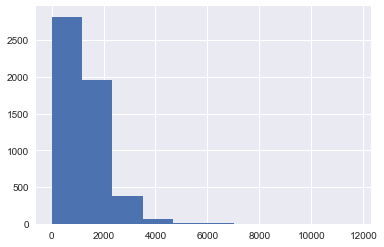

In [38]:
doc_df.length.hist()

Distribution of courses by faculty

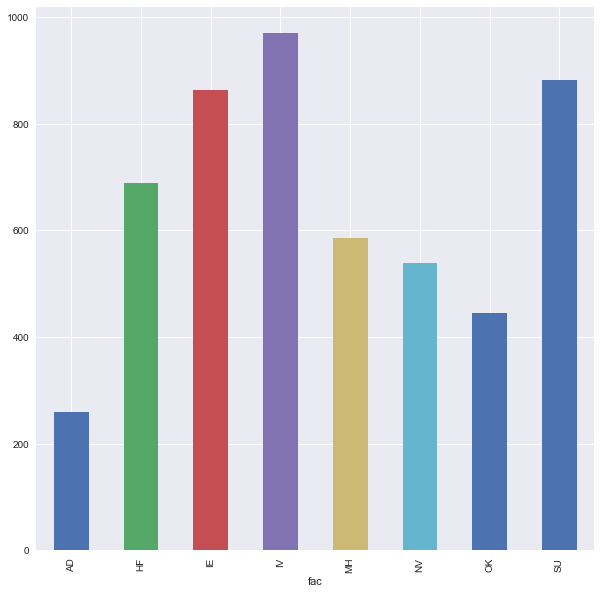

In [39]:
doc_df.groupby("fac")["fac"].agg("count").plot(kind="bar", figsize=(10,10))

Create a DataFrame from the grade-dictionary

In [40]:
max([len(v) for k, v in grades.items()])

38

In [41]:
rows = []
for k,v in grades.items():
    for rec in v:
        if (type(rec)==dict):
            rows.append(([k]+list(rec.values())))
        else:
            pass
            #print(type(rec))
            #print(rec)

In [42]:
rec

{'semester_code': 'V2018',
 'average_grade': 3.9411764705882355,
 'passed': 0,
 'a': 4,
 'b': 8,
 'c': 5,
 'd': 0,
 'e': 0,
 'f': 0}

In [43]:
doc_df.shape

(5233, 6)

In [44]:
doc_df = doc_df[doc_df.length>0]

In [45]:
doc_df.shape

(4058, 6)

In [46]:
grade_df = pd.DataFrame(rows, columns=["emne"]+list(rec.keys()))
grade_df.head(20)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0
5,MA3402,H2012,4.750000,0,3,1,0,0,0,0
6,MA3402,H2013,4.000000,0,2,1,2,0,0,0
7,MA3402,H2014,4.250000,0,6,1,0,0,0,1
8,MA3402,H2015,3.916667,0,6,3,0,2,1,0
9,MA3402,H2016,3.900000,0,6,2,0,0,1,1


In [47]:
if SAVE:
    grade_df.to_pickle("grade_df.pkl")

In [48]:
merged = grade_df.merge(doc_df.loc[:,["emne", "fac", "inst"]], how="left", on="emne")

In [49]:
merged.head()

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0,IE,IE-IMF
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0,IE,IE-IMF
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0,IE,IE-IMF
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0,IE,IE-IMF
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0,IE,IE-IMF


In [50]:
merged["year"] = merged.semester_code.apply(lambda x: int(x[1:]))
merged.sample(5)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst,year
26078,KULMI3090,V2017,3.375000,0,1,2,4,1,0,0,HF,HF-IHS,2017
35588,IP102714,H2017,0.000000,23,0,0,0,0,0,0,IV,IV-IHB,2017
1900,KT8212,H2015,0.000000,4,0,0,0,0,0,0,IV,IV-KT,2015
22712,PSYPRO4204,V2016,0.000000,61,0,0,0,0,0,0,SU,SU-IPS,2016
32777,TKT4116,V2009,3.215054,0,105,105,151,38,21,45,IV,IV-KT,2009


Average grade distribution by faculty

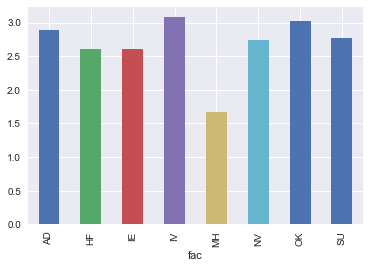

In [51]:
merged.groupby("fac")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IE

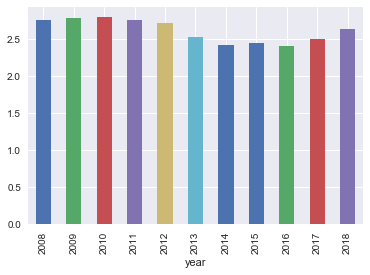

In [52]:
merged.loc[(merged.year>=2008) & (merged.fac=="IE")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IDI

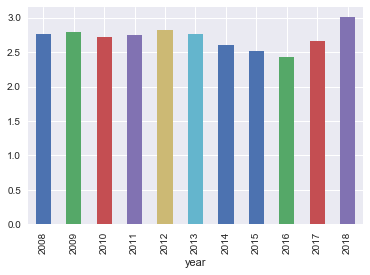

In [53]:
merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Increase in percentage since 2016

In [54]:
vals = merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean")[[2016, 2018]].values
vals

array([2.42301678, 3.00379264])

In [55]:
vals[1]/vals[0]

1.2396912255978179

In [56]:
if SAVE:
    merged.to_pickle("merged.pkl")

## Special case: Natural Language Processing (NLP)

In [57]:
doc_df.description["IT3708"]

'The main focus of the course is to build intelligent systems based on two key natural concepts: evolution by natural selection and swarm intelligence.  Such intelligent systems have thousands of useful applications in fields as diverse as control theory, telecommunications, music and art.  This course discusses both methods in great detail along with providing a bit of the biological basis for each.Lecture slides, a textbook (possibly 2).  Textbooks are chosen  at the beginning of the semester.Students will get both theoretical and practical programming experience with two of the best known sub-symbolic AI methods: evolutionary algorithms and swarm intelligence algorithms. '

In [58]:
remove_punctuation = lambda d: "".join([ (c if c not in string.punctuation+"\n\r\t" else " ") for c in d])

In [59]:
remove_punctuation(doc_df.description["IT3708"])

'The main focus of the course is to build intelligent systems based on two key natural concepts  evolution by natural selection and swarm intelligence   Such intelligent systems have thousands of useful applications in fields as diverse as control theory  telecommunications  music and art   This course discusses both methods in great detail along with providing a bit of the biological basis for each Lecture slides  a textbook  possibly 2    Textbooks are chosen  at the beginning of the semester Students will get both theoretical and practical programming experience with two of the best known sub symbolic AI methods  evolutionary algorithms and swarm intelligence algorithms  '

In [60]:
stemmer = PorterStemmer()

In [61]:
?PorterStemmer

In [62]:
tokenize = lambda d: [stemmer.stem(w.lower()) for w in remove_punctuation(d).split(" ") if len(w)>0]

In [63]:
tokenize(doc_df.description["IT3708"])

['the',
 'main',
 'focu',
 'of',
 'the',
 'cours',
 'is',
 'to',
 'build',
 'intellig',
 'system',
 'base',
 'on',
 'two',
 'key',
 'natur',
 'concept',
 'evolut',
 'by',
 'natur',
 'select',
 'and',
 'swarm',
 'intellig',
 'such',
 'intellig',
 'system',
 'have',
 'thousand',
 'of',
 'use',
 'applic',
 'in',
 'field',
 'as',
 'divers',
 'as',
 'control',
 'theori',
 'telecommun',
 'music',
 'and',
 'art',
 'thi',
 'cours',
 'discuss',
 'both',
 'method',
 'in',
 'great',
 'detail',
 'along',
 'with',
 'provid',
 'a',
 'bit',
 'of',
 'the',
 'biolog',
 'basi',
 'for',
 'each',
 'lectur',
 'slide',
 'a',
 'textbook',
 'possibl',
 '2',
 'textbook',
 'are',
 'chosen',
 'at',
 'the',
 'begin',
 'of',
 'the',
 'semest',
 'student',
 'will',
 'get',
 'both',
 'theoret',
 'and',
 'practic',
 'program',
 'experi',
 'with',
 'two',
 'of',
 'the',
 'best',
 'known',
 'sub',
 'symbol',
 'ai',
 'method',
 'evolutionari',
 'algorithm',
 'and',
 'swarm',
 'intellig',
 'algorithm']

In [64]:
doc_df.description.sample().values

array(['The course is given every second year, next time autumn 2018.\r\n\r\nThe course is divided in three main parts which amount to about 1/3 each:\r\n- Transmission electron microscopy (TEM)\r\n- Scanning electron microscopy (SEM)\r\n- Specimen preparation methods and techniques for TEM and SEM and damage analysisCourse material: \r\nGoldstein, Newbury, Echlin, Joy, Fiori and Lishin: Scanning Electron Microscopy and X-ray Microanalyses. (Utvalgte deler.) \r\nUtvalgte papers\r\nBrooks & Choudhury: Metallurgical Failure Analysis \r\nWilliams, David B., Carter, C. Barry: Transmission Electron Microscopy - A Textbook for Materials Science Springer 2. Ed 2009. (e-bok) \r\nThe course is intended to give a theoretical basis for the practical application of SEM and TEM in selected areas of material science and enginnering\r\n\r\nAfter completed the course the student should be able to \r\n- account for the theory behind X-ray microanalysis in SEM/TEM\r\n- carry out qualitative and quantita

## Data science step 3: Feature Engineering

In [65]:
?TfidfVectorizer

In [66]:
if LOAD:
    stoplist = pickle.load(open("webapp/stoplist.pkl","rb"))
else:
    res = requests.get("https://www.textfixer.com/tutorials/common-english-words.txt")
    stoplist = res.text.split(",")
stoplist

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [67]:
if SAVE:
    pickle.dump(stoplist, open("webapp/stoplist.pkl","wb"))

In [68]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words=stoplist)

## Data science step 4: Modelling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

- Train/(validation)/test split 
- Stratify

In [70]:
X_train, X_test, y_train, y_test = train_test_split(doc_df.description, doc_df.fac, stratify=doc_df.fac)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043,), (3043,), (1015,), (1015,))

In [72]:
pd.get_dummies(y_train).head()

,AD,HF,IE,IV,MH,NV,OK,SU
TBA4292,0,0,0,1,0,0,0,0
EDU3082,0,0,0,0,0,0,0,1
FM3004,0,1,0,0,0,0,0,0
KJ2900,0,0,0,0,0,1,0,0
IP502009,0,0,0,1,0,0,0,0


In [73]:
X_train = pd.concat([X_train, pd.get_dummies(y_train)], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(y_test)], axis=1)

If we want to train on full dataset

In [74]:
if not TRAIN:
    if LOAD:
        all_doc = pickle.load( open("webapp/all_doc.pkl", "rb"))
        X_all = pd.read_pickle("webapp/X_all.df")
    else:
        X_all = pd.concat([doc_df.description, pd.get_dummies(doc_df.fac)], axis=1)
        all_doc = vec.fit_transform(X_all.description.values)
        if SAVE:
            X_all.to_pickle("webapp/X_all.df")
            pickle.dump(all_doc, open("webapp/all_doc.pkl", "wb"))
    print(all_doc.shape)

In [75]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043, 9), (3043,), (1015, 9), (1015,))

In [76]:
trn_doc = vec.fit_transform(X_train.description.values)
test_doc = vec.transform(X_test.description.values)

In [77]:
trn_doc.shape

(3043, 30305)

In [78]:
trn_doc[0]

<1x30305 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

In [79]:
vec.vocabulary_

{'recent': 21734,
 'topic': 27788,
 'method': 16502,
 'disciplin': 8002,
 'within': 29677,
 'field': 10275,
 'marin': 15941,
 'civil': 4542,
 'engin': 9068,
 'present': 20073,
 'discuss': 8055,
 'appli': 1909,
 'thi': 27372,
 'advanc': 1191,
 'cours': 6075,
 'focu': 10631,
 'subject': 25738,
 'relat': 21986,
 'current': 6614,
 'research': 22456,
 'new': 17601,
 'develop': 7431,
 'student': 25348,
 'expect': 9834,
 'critic': 6449,
 'read': 21651,
 'review': 22794,
 'scientif': 23281,
 'public': 21305,
 'activ': 1020,
 'contribut': 5827,
 'colloquia': 4746,
 'content': 5719,
 'extent': 10064,
 'adapt': 1082,
 'issu': 13908,
 'ntnu': 17863,
 'compendia': 4990,
 'select': 23489,
 'report': 22331,
 'paper': 18710,
 'state': 24973,
 'begin': 3088,
 'term': 26786,
 'provid': 21201,
 'depth': 7107,
 'knowledg': 14236,
 'compet': 5003,
 'skill': 24093,
 'solv': 24520,
 'technolog': 26658,
 'problem': 20344,
 'further': 11122,
 'shall': 23791,
 'abl': 597,
 'evalu': 9584,
 'materi': 16067,
 'abs

In [80]:
trn_doc[0].todense(), trn_doc[0].todense().shape

(matrix([[0., 0., 0., ..., 0., 0., 0.]]), (1, 30305))

In [81]:
np.where(trn_doc[0].todense())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64),
 array([  597,   635,   687,   756,   758,  1011,  1019,  1020,  1033,
         1082,  1191,  1197,  1539,  1602,  1746,  1774,  1909,  1996,
         2133,  2140,  2458,  2467,  2510,  2567,  2909,  2923,  3088,
         3097,  3753,

In [82]:
inv_voc = {v:k for k,v in vec.vocabulary_.items()}

In [83]:
X_train.description.iloc[0]

'Recent topics and methods from disciplines within the fields of Marine Civil Engineering will be presented, discussed and applied. As this is an advanced course in Marine Civil Engineering focus will be on subjects related to current research and new developments within the field. The students are expected to critically read and review scientific publications, and actively contribute to the subjects presented in the course. The students are also expected to contribute to presentations and discussions in colloquia. The content will, to some extent, be adapted to current issues and research within Marine Civil Engineering at NTNU.Compendia, selected reports and scientific papers. Will be stated at the beginning of the term.Provide students with depth of knowledge, competence and skills to solve technological problems in selected fields of Marine civil engineering. Further the students shall be able to critically evaluate methods and scientific materials.\r\n\r\nKnowledge\r\nStudents sho

In [84]:
[inv_voc[x] for x in np.where(trn_doc[0].todense())[1]]

['abl',
 'abl critic',
 'abl measur',
 'abstract',
 'abstract problem',
 'action',
 'action structur',
 'activ',
 'activ contribut',
 'adapt',
 'advanc',
 'advanc cours',
 'analysi',
 'analysi gener',
 'analyz',
 'analyz environment',
 'appli',
 'appli thi',
 'appropri',
 'appropri model',
 'assess',
 'assess calcul',
 'assess relev',
 'associ',
 'basi',
 'basi evalu',
 'begin',
 'begin term',
 'calcul',
 'calcul within',
 'carlo',
 'carlo simul',
 'civil',
 'civil engin',
 'colloquia',
 'colloquia content',
 'combin',
 'compendia',
 'compet',
 'compet skill',
 'compet student',
 'condit',
 'condit environment',
 'conduct',
 'content',
 'content extent',
 'contribut',
 'contribut present',
 'contribut subject',
 'cours',
 'cours student',
 'critic',
 'critic evalu',
 'critic read',
 'current',
 'current issu',
 'current research',
 'current wind',
 'data',
 'data evalu',
 'data relat',
 'decis',
 'decis make',
 'depth',
 'depth knowledg',
 'descript',
 'descript model',
 'determin',
 '

In [85]:
label_cols = doc_df.fac.unique().tolist()
label_cols

['IE', 'HF', 'IV', 'AD', 'SU', 'MH', 'NV', 'OK']

In [86]:
trn_doc.shape

(3043, 30305)

In [87]:
if not TRAIN:
    trn_doc = all_doc
    X_train = X_all

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

![title](nb.png)

In [88]:
def prior(y_i, y):
    '''
    y_i is either 1 or 0.
    y is numpy array of labels
    '''
    p = trn_doc[y==y_i].sum(0) # Number of documents in trn_doc with given label
    return (p+1) / ((y==y_i).sum()+1) # Fraction of all documents with given label

In [89]:
def get_mdl(y):
    y = y.values #pandas Series to numpy array
    r = np.log(prior(1,y) / prior(0,y)) #Log likelihood ratio for both possibilities
    m = LogisticRegression(C=4, multi_class="ovr") # Logistic regression model
    x_nb = trn_doc.multiply(r) # Multiply the Tf-idf features with this ratio
    return m.fit(x_nb, y), r

Create empty array to store prdictions

In [90]:
preds = np.zeros((len(X_test), len(label_cols)))
preds.shape

(1015, 8)

In [91]:
X_train.head()

,description,AD,HF,IE,IV,MH,NV,OK,SU
TBA4292,Recent topics and methods from disciplines wit...,0,0,0,1,0,0,0,0
EDU3082,The subject is meant to qualify the student to...,0,0,0,0,0,0,0,1
FM3004,All students in the master's program in film a...,0,1,0,0,0,0,0,0
KJ2900,The bachelor project should be presented as an...,0,0,0,0,0,1,0,0
IP502009,To be defined individually.Learning outcome\r\...,0,0,0,1,0,0,0,0


In [92]:
models = {}
rs = {}
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(X_train[j])
    if TRAIN:
        preds[:,i] = m.predict_proba(test_doc.multiply(r))[:,1]
    else:
        if SAVE:
            np.save(open("webapp/r_"+j+".npy", "wb"), r)
            pickle.dump(m, open("webapp/"+j+"_model.pkl", "wb"))
    models[j] = m
    rs[j] = r

fit IE
fit HF
fit IV
fit AD
fit SU
fit MH
fit NV
fit OK


In [93]:
if not TRAIN:
    print("Steps below not applicable")
    raise NotImplementedError

In [94]:
df_preds = pd.DataFrame(preds, columns=label_cols)
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,0.038874,0.005911,0.642440,0.008389,0.008735,0.007631,0.264668,0.010467
1,0.014591,0.009294,0.141233,0.005262,0.015773,0.010499,0.835723,0.018155
2,0.008831,0.871042,0.035344,0.005727,0.024438,0.007066,0.011509,0.007686
3,0.044627,0.058564,0.022983,0.011323,0.028312,0.588001,0.021752,0.013036
4,0.985382,0.011452,0.043421,0.004485,0.025233,0.008916,0.033344,0.009042


In [95]:
y_test = X_test.loc[:,label_cols]

In [96]:
for c in df_preds.columns:
    df_preds[c] = (df_preds.max(axis=1)==df_preds[c]).astype(int)

In [97]:
y_test.head()

,IE,HF,IV,AD,SU,MH,NV,OK
TEP4212,0,0,1,0,0,0,0,0
MK211712,0,0,0,0,0,0,1,0
ANT1104,0,1,0,0,0,0,0,0
KLMED8010,0,0,0,0,0,1,0,0
MA3403,1,0,0,0,0,0,0,0


In [98]:
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0


In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
pd.DataFrame(confusion_matrix(y_test.values.argmax(axis=1), df_preds.values.argmax(axis=1)), index=label_cols, columns=label_cols)

,IE,HF,IV,AD,SU,MH,NV,OK
IE,141,2,9,0,1,0,1,1
HF,0,161,1,0,3,1,0,1
IV,11,0,209,0,2,0,4,3
AD,7,7,6,34,2,0,0,1
SU,2,1,6,0,115,0,0,2
MH,3,0,2,0,6,66,2,0
NV,3,3,9,0,0,3,87,1
OK,6,3,8,0,5,0,0,74


Accuracy:

In [101]:
(y_test.values.argmax(axis=1)==df_preds.values.argmax(axis=1)).sum()/len(y_test)

0.8738916256157635

Accuracy not the most "fair" metric in multi-class classification problems

In [102]:
comp = pd.DataFrame(np.concatenate([y_test.values, df_preds.values], axis=1))
comp.columns = label_cols+[x+"_pred" for x in label_cols]
comp.head()

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,IV_pred,AD_pred,SU_pred,MH_pred,NV_pred,OK_pred
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [103]:
comp[comp.IE!=comp.IE_pred]

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,IV_pred,AD_pred,SU_pred,MH_pred,NV_pred,OK_pred
14,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
45,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
69,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
83,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
130,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
152,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
215,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [104]:
wrong_df = pd.DataFrame(preds[comp.IE!=comp.IE_pred], index=comp[comp.IE!=comp.IE_pred].index, columns=[c+"_prob" for c in label_cols])
wrong_df

,IE_prob,HF_prob,IV_prob,AD_prob,SU_prob,MH_prob,NV_prob,OK_prob
14,0.093980,0.010571,0.067442,0.009154,0.011598,0.009796,0.048334,0.017166
45,0.137762,0.032419,0.067236,0.039957,0.021754,0.055533,0.076955,0.127670
69,0.688613,0.007678,0.087561,0.012414,0.010506,0.065013,0.048324,0.007314
75,0.721208,0.013016,0.038647,0.010985,0.021874,0.009487,0.009175,0.861706
83,0.333604,0.007709,0.065550,0.005139,0.009308,0.006705,0.020671,0.276250
130,0.029789,0.298171,0.042764,0.006428,0.024563,0.007786,0.012645,0.039460
146,0.137762,0.032419,0.067236,0.039957,0.021754,0.055533,0.076955,0.127670
152,0.334011,0.006905,0.240132,0.033610,0.015016,0.006755,0.017068,0.016653
181,0.053004,0.012830,0.036666,0.005256,0.016110,0.014821,0.015549,0.013332
215,0.137762,0.032419,0.067236,0.039957,0.021754,0.055533,0.076955,0.127670


In [105]:
pd.concat([comp[comp.IE!=comp.IE_pred], wrong_df], axis=1)

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,...,NV_pred,OK_pred,IE_prob,HF_prob,IV_prob,AD_prob,SU_prob,MH_prob,NV_prob,OK_prob
14,0,0,0,0,0,0,0,1,1,0,...,0,0,0.093980,0.010571,0.067442,0.009154,0.011598,0.009796,0.048334,0.017166
45,0,0,0,0,1,0,0,0,1,0,...,0,0,0.137762,0.032419,0.067236,0.039957,0.021754,0.055533,0.076955,0.127670
69,0,0,0,0,0,1,0,0,1,0,...,0,0,0.688613,0.007678,0.087561,0.012414,0.010506,0.065013,0.048324,0.007314
75,1,0,0,0,0,0,0,0,0,0,...,0,1,0.721208,0.013016,0.038647,0.010985,0.021874,0.009487,0.009175,0.861706
83,0,0,0,0,0,0,0,1,1,0,...,0,0,0.333604,0.007709,0.065550,0.005139,0.009308,0.006705,0.020671,0.276250
130,1,0,0,0,0,0,0,0,0,1,...,0,0,0.029789,0.298171,0.042764,0.006428,0.024563,0.007786,0.012645,0.039460
146,0,0,0,1,0,0,0,0,1,0,...,0,0,0.137762,0.032419,0.067236,0.039957,0.021754,0.055533,0.076955,0.127670
152,0,0,1,0,0,0,0,0,1,0,...,0,0,0.334011,0.006905,0.240132,0.033610,0.015016,0.006755,0.017068,0.016653
181,0,0,0,0,0,0,0,1,1,0,...,0,0,0.053004,0.012830,0.036666,0.005256,0.016110,0.014821,0.015549,0.013332
215,0,0,0,0,0,0,1,0,1,0,...,0,0,0.137762,0.032419,0.067236,0.039957,0.021754,0.055533,0.076955,0.127670


Choose a random sample where prediction was wrong

In [106]:
doc_df.rename(columns={"emne":"course"}).to_csv("course_descriptions.csv")

In [107]:
grade_df.rename(columns={"emne":"course"}).to_csv("grades.csv")

In [108]:
def get_wrong_ie():
    ind = random.choice(wrong_df.index.values)
    print("Randomly selected sample with index {}".format(ind))
    print("Description: \n")
    print(X_test.description.iloc[ind])
    print("\nPredictions:")
    print(wrong_df.loc[ind])
    print("\nTrue:")
    print(X_test.index.values[ind])
    print("\n")
    print(comp.loc[ind,label_cols]) #.iloc[ind])

In [109]:
get_wrong_ie()

Randomly selected sample with index 181
Description: 

Literature is given at the start of the semester.

Predictions:
IE_prob    0.053004
HF_prob    0.012830
IV_prob    0.036666
AD_prob    0.005256
SU_prob    0.016110
MH_prob    0.014821
NV_prob    0.015549
OK_prob    0.013332
Name: 181, dtype: float64

True:
TEK3105


IE    0
HF    0
IV    0
AD    0
SU    0
MH    0
NV    0
OK    1
Name: 181, dtype: int32


In [110]:
def get_confident():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-110-9047037cb81f>, line 2)

In [ ]:
def classify(text):
    preds = {}
    test_doc = vec.transform([text])
    for label, m in models.items():
        init_preds = m.predict_proba(test_doc.multiply(rs[label]))[:,1]
        preds[label] = init_preds[0]
    return preds

In [ ]:
classify('Machine learning algorithms are complex computer systems and artificial intelligence is really cool')

In [ ]:
classify('Neurologial biological human medicine interaction patients prosthesis')

## And we had to make a wep app...

https://ntnucc.azurewebsites.net